<a href="https://colab.research.google.com/github/Saidbey/Autocost-prediction/blob/main/autocostipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS maxsus guruh topshiriqlar/auto_costs.csv")
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
df['company']=df['name'].str.split().str.slice(start=0,stop=1).str.join(' ')

In [39]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

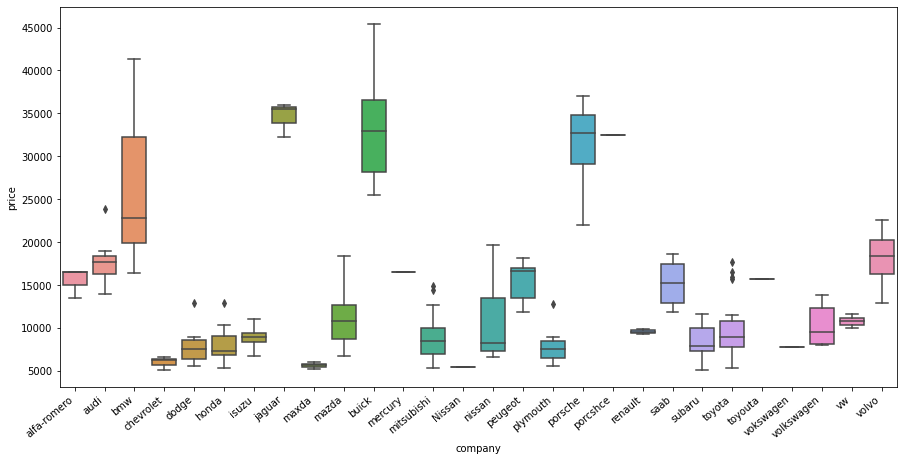

In [40]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

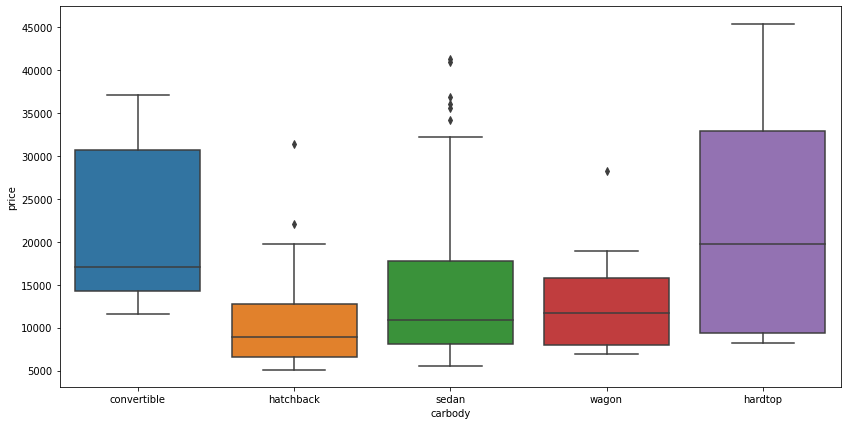

In [41]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='carbody',y='price',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


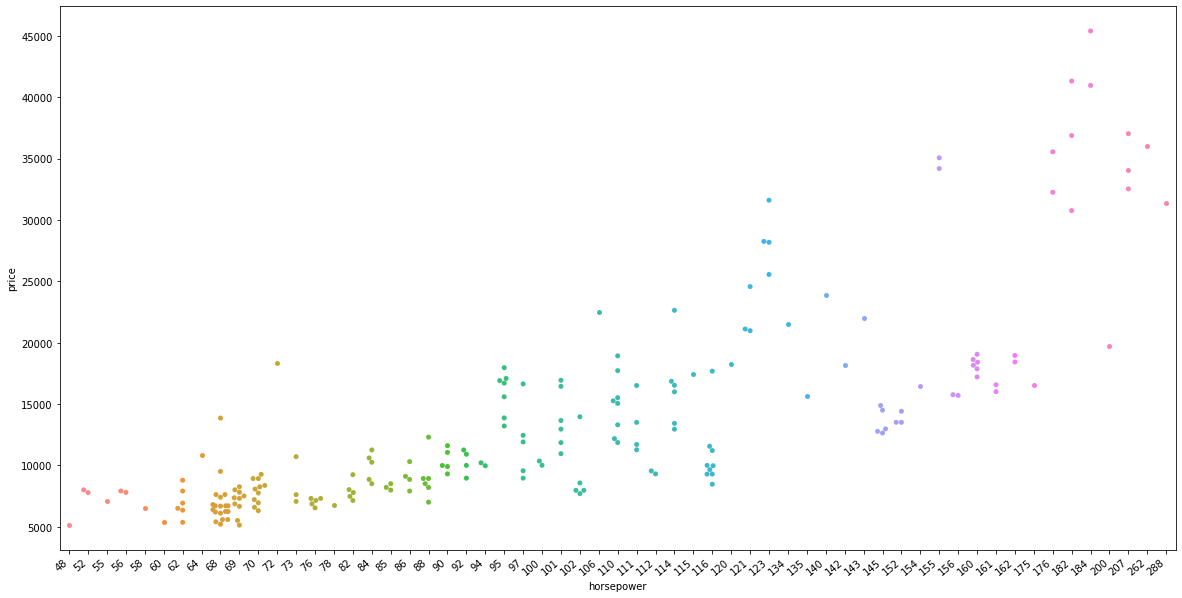

In [42]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='horsepower',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [43]:
# sns.relplot(x='highwaympg',y='price',data=df,height=7,aspect=1.5)

In [44]:
# sns.relplot(x='drivewheels',y='price',data=df,height=7,aspect=1.5)

In [45]:
encoder_label = LabelEncoder()
df.carbody = encoder_label.fit_transform(df.carbody)
df.drivewheels = encoder_label.fit_transform(df.drivewheels)
df.enginelocation = encoder_label.fit_transform(df.enginelocation)
df.aspiration = encoder_label.fit_transform(df.aspiration)
df.cylindernumber = encoder_label.fit_transform(df.cylindernumber)

In [46]:
df.describe(include='all')

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
count,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,...,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
unique,NaN,NaN,147,2,NaN,2,NaN,NaN,NaN,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
top,NaN,NaN,toyota corona,gas,NaN,four,NaN,NaN,NaN,NaN,...,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota
freq,NaN,NaN,6,185,NaN,115,NaN,NaN,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
mean,103.000000,0.834146,NaN,NaN,0.180488,NaN,2.614634,1.326829,0.014634,98.756585,...,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,NaN
std,59.322565,1.245307,NaN,NaN,0.385535,NaN,0.859081,0.556171,0.120377,6.021776,...,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,NaN
min,1.000000,-2.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,86.600000,...,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,52.000000,0.000000,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,94.500000,...,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,NaN
50%,103.000000,1.000000,NaN,NaN,0.000000,NaN,3.000000,1.000000,0.000000,97.000000,...,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,154.000000,2.000000,NaN,NaN,0.000000,NaN,3.000000,2.000000,0.000000,102.400000,...,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,NaN


In [47]:
# X = df[['name','fueltypes','aspiration', 'doornumbers', 'carbody','drivewheels','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
X=df[['carbody','drivewheels','enginelocation','enginesize','carwidth','curbweight','horsepower']]
y = df['price']

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         205 non-null    int64  
 1   drivewheels     205 non-null    int64  
 2   enginelocation  205 non-null    int64  
 3   enginesize      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   curbweight      205 non-null    int64  
 6   horsepower      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [50]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [51]:
ohe=OneHotEncoder()
ohe.fit(X_train[['carbody','drivewheels', 'enginelocation']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [52]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['carbody','drivewheels','enginelocation']),
                                    remainder='passthrough')

Linear Regression Model

In [53]:
lr=LinearRegression()
lr

LinearRegression()

Making a pipeline

In [54]:
pipe=make_pipeline(column_trans,lr)

Fitting the model

In [55]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([0, 1, 2, 3, 4]),
                                                                            array([0, 1, 2]),
                                                                            array([0, 1])]),
                                                  ['carbody', 'drivewheels',
                                                   'enginelocation'])])),
                ('linearregression', LinearRegression())])

In [56]:
y_pred=pipe.predict(X_test)

Checking R2 Score

In [57]:
r2_score(y_test,y_pred)

0.8024252452487829

In [58]:
data = {'carbody' : 1,'enginesize' : 120, 'curbweight' : 1577, 'horsepower' : 200, 'carwidth' : 70, 'drivewheels' : 0, 'enginelocation' : 1, 'Model' : 'Malibu'}
test = pd.DataFrame(data= data, index=[1])
test

,carbody,enginesize,curbweight,horsepower,carwidth,drivewheels,enginelocation,Model
1,1,120,1577,200,70,0,1,Malibu


In [59]:
price = (pipe.predict(test.iloc[:,:-1]))
name = test.iloc[0, 7]


In [60]:
print(f"Madel : {name}\nPrice : {price}$")

Madel : Malibu
Price : [35568.98762562]$
